In [1]:
# Author: Tiago Tamagusko (tamagusko@gmail.com)
# Version: 3.0 (2023-09-17)

In [2]:
import pandas as pd

In [26]:
# Data

# Structure
df = pd.read_csv('processed/ltpp_data.csv')

In [4]:
df.head()

,YEAR,AADTT,TRAFFIC_OPEN_DATE,SN,PRECIPITATION,TEMPERATURE,IRI,STATION_ID
0,1989,1190.0,1985,6.1,1372.800049,12.000000,0.8984,34_1638
1,1989,490.0,1985,3.3,260.799988,6.100000,1.2738,16_1021
2,1989,151.0,1982,4.3,634.200012,6.000000,1.0314,30_1001
3,1989,195.0,1984,3.2,1546.099976,16.200001,1.0448,37_1030
4,1989,1690.0,1985,8.3,1125.199951,7.200000,0.7238,23_1012


In [5]:
df.columns

Index(['YEAR', 'AADTT', 'TRAFFIC_OPEN_DATE', 'SN', 'PRECIPITATION',
       'TEMPERATURE', 'IRI', 'STATION_ID'],
      dtype='object')

In [21]:
# Data engeneering
df['AGE'] = df['YEAR'] - df['TRAFFIC_OPEN_DATE']

# 
# For AADTT
df['ACCUMULATED_AADTT'] = df.sort_values('YEAR').groupby(['STATION_ID'])['AADTT'].cumsum()

# For PRECIPITATION
df['MEDIAN_PRECIPITATION'] = (df.sort_values('YEAR')
                          .groupby(['STATION_ID'])['PRECIPITATION']
                          .cumsum()) / (df.sort_values('YEAR')
                                        .groupby(['STATION_ID'])
                                        .cumcount() + 1)

# For TEMPERATURE
df['MEDIAN_TEMPERATURE'] = (df.sort_values('YEAR')
                        .groupby(['STATION_ID'])['TEMPERATURE']
                        .cumsum()) / (df.sort_values('YEAR')
                                      .groupby(['STATION_ID'])
                                      .cumcount() + 1)



In [27]:
# Drop unused columns
columns_to_drop = ['TRAFFIC_OPEN_DATE', 
                   'AADTT', 
                   'PRECIPITATION', 
                   'TEMPERATURE']
df = df.drop(columns_to_drop, axis=1)
df.head()

,YEAR,SN,IRI,STATION_ID
0,1989,6.1,0.8984,34_1638
1,1989,3.3,1.2738,16_1021
2,1989,4.3,1.0314,30_1001
3,1989,3.2,1.0448,37_1030
4,1989,8.3,0.7238,23_1012


In [14]:
# View data

def query_data(id):  
    return df[(df['STATION_ID'] == id)]

unique_station_ids = df['STATION_ID'].unique()
unique_station_ids

array(['34_1638', '16_1021', '30_1001', '37_1030', '23_1012', '50_1002',
       '6_1253', '18_2009', '53_1501', '56_2018', '85_1801', '85_1808',
       '26_1010', '6_2647', '26_1001', '27_1029', '28_3082', '13_4111',
       '12_9054', '12_4108', '12_4107', '12_4105', '12_4103', '12_4099',
       '12_4097', '12_3996', '17_1003', '28_3083', '1_1021', '48_3609',
       '48_3559', '48_1060', '48_1049', '47_3075', '45_1008', '40_4165',
       '40_1015', '35_2006', '35_1112', '35_1022', '12_3995', '29_1005',
       '12_1060', '28_1016', '6_8151', '1_4126', '6_2004', '6_8201',
       '5_3048', '1_4125', '15_7080', '40_1017', '15_1008', '15_1006',
       '15_1003'], dtype=object)

In [25]:
query_data('37_1030')

,YEAR,AADTT,SN,IRI,STATION_ID,AGE,ACCUMULATED_AADTT,MEDIAN_PRECIPITATION,MEDIAN_TEMPERATURE
3,1989,195.0,3.2,1.0448,37_1030,5,195.0,1546.099976,16.200001
45,1990,203.0,3.2,1.1028,37_1030,6,398.0,1330.700012,16.800000
71,1991,211.0,3.2,1.1042,37_1030,7,609.0,1353.033325,16.866667
107,1992,209.0,3.2,0.9996,37_1030,8,818.0,1321.500000,16.675000
162,1993,219.0,3.2,1.0624,37_1030,9,1037.0,1278.780005,16.620000
177,1994,198.0,3.2,1.1084,37_1030,10,1235.0,1270.466675,16.616667
208,1995,229.0,3.2,1.1546,37_1030,11,1464.0,1230.628575,16.585714
238,1997,267.0,3.2,1.1872,37_1030,13,1731.0,1200.587501,16.475000
262,1998,278.0,3.2,1.1636,37_1030,14,2009.0,1211.266662,16.522222
304,1999,289.0,3.2,1.1698,37_1030,15,2298.0,1235.209991,16.530000


In [18]:
# Split into target and dataset
y = DATA['IRI']  # target
X = DATA.drop(['IRI'], axis=1)

In [19]:
X.shape, y.shape

((395, 6), (395,))

In [20]:
# Split in 75/25 (train/test)
train_threshold = 0.75

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_threshold, random_state=0)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split

%matplotlib inline

# improve quality of images
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
sns.set(rc={"figure.dpi":400, 'savefig.dpi':400})
sns.set_context('notebook')
sns.set_style("ticks")

# Regressors
DT_reg = DecisionTreeRegressor(random_state=42, max_depth=10)
RF_reg = RandomForestRegressor(random_state=42, max_depth=10)
XG_reg = xgb.XGBRegressor(random_state=42, max_depth=4)

In [22]:
# Train models
DT_reg.fit(X_train, y_train)
RF_reg.fit(X_train, y_train)
XG_reg.fit(X_train, y_train)
print('Data trained! =)')

Data trained! =)


In [23]:
# Predict results
resultDT = DT_reg.predict(X_test)
resultRF = RF_reg.predict(X_test)
resultXG = XG_reg.predict(X_test)
print('Predicted! =)')

Predicted! =)


In [24]:
# def corrdot(*args, **kwargs):
#     corr_r = args[0].corr(args[1], 'pearson')
#     corr_text = f"{corr_r:2.2f}".replace("0.", ".")
#     ax = plt.gca()
#     ax.set_axis_off()
#     marker_size = abs(corr_r) * 30000
#     ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
#                vmin=-1, vmax=1, transform=ax.transAxes)
#     font_size = abs(corr_r) * 50 + 5
#     ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
#                 ha='center', va='center', fontsize=font_size)

# sns.set(style='ticks', font_scale=1.6)

# g = sns.PairGrid(DATA, aspect=1.4, diag_sharey=False)
# g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
# g.map_diag(sns.histplot, kde_kws={'color': 'black'})
# g.map_upper(corrdot)
# # g.savefig('results/scatter_matrixSNS.png')

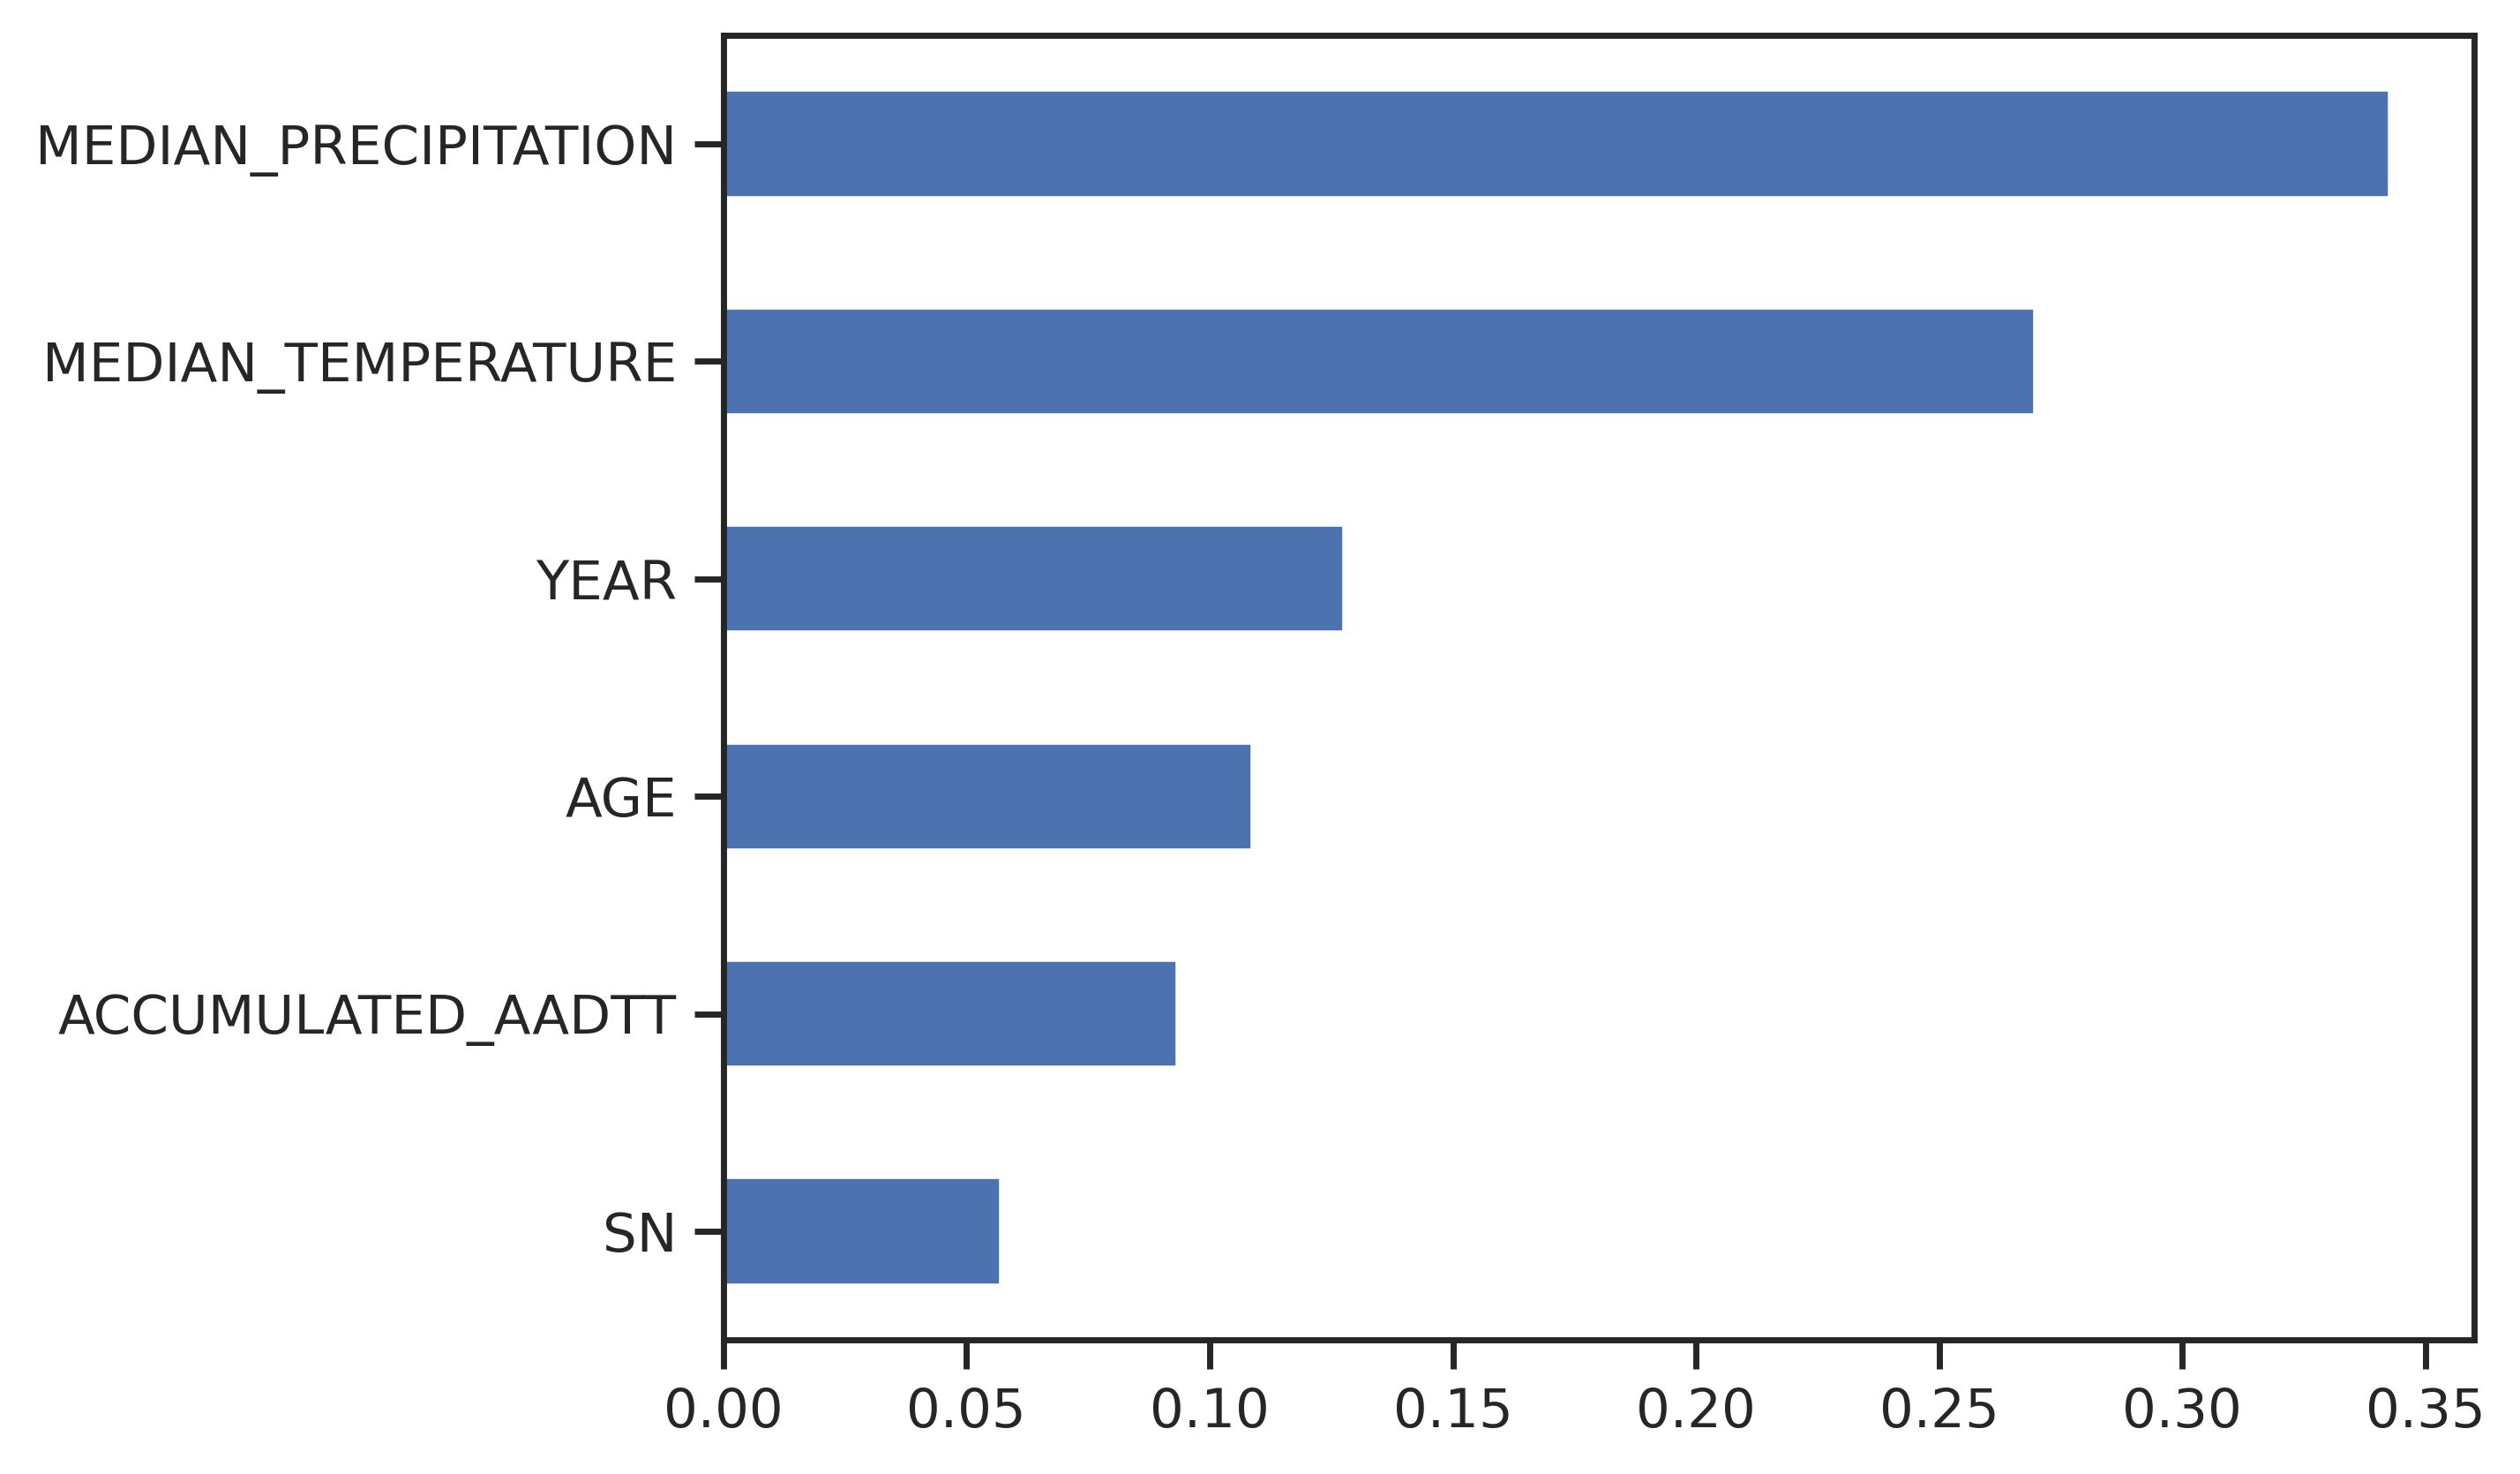

In [25]:
# feature importance for DT
importanceDT = DT_reg.feature_importances_
graphImportanceDT = pd.Series(importanceDT, index=X_train.columns).sort_values().plot.barh()
fig = graphImportanceDT.get_figure()
# fig.savefig('results/importanceDT.png')

In [26]:
# summarize feature importance for DT

for i, v in enumerate(importanceDT):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i], v))

Feature: YEAR, Score: 0.12779
Feature: SN, Score: 0.05727
Feature: AGE, Score: 0.10889
Feature: ACCUMULATED_AADTT, Score: 0.09349
Feature: MEDIAN_PRECIPITATION, Score: 0.34282
Feature: MEDIAN_TEMPERATURE, Score: 0.26974


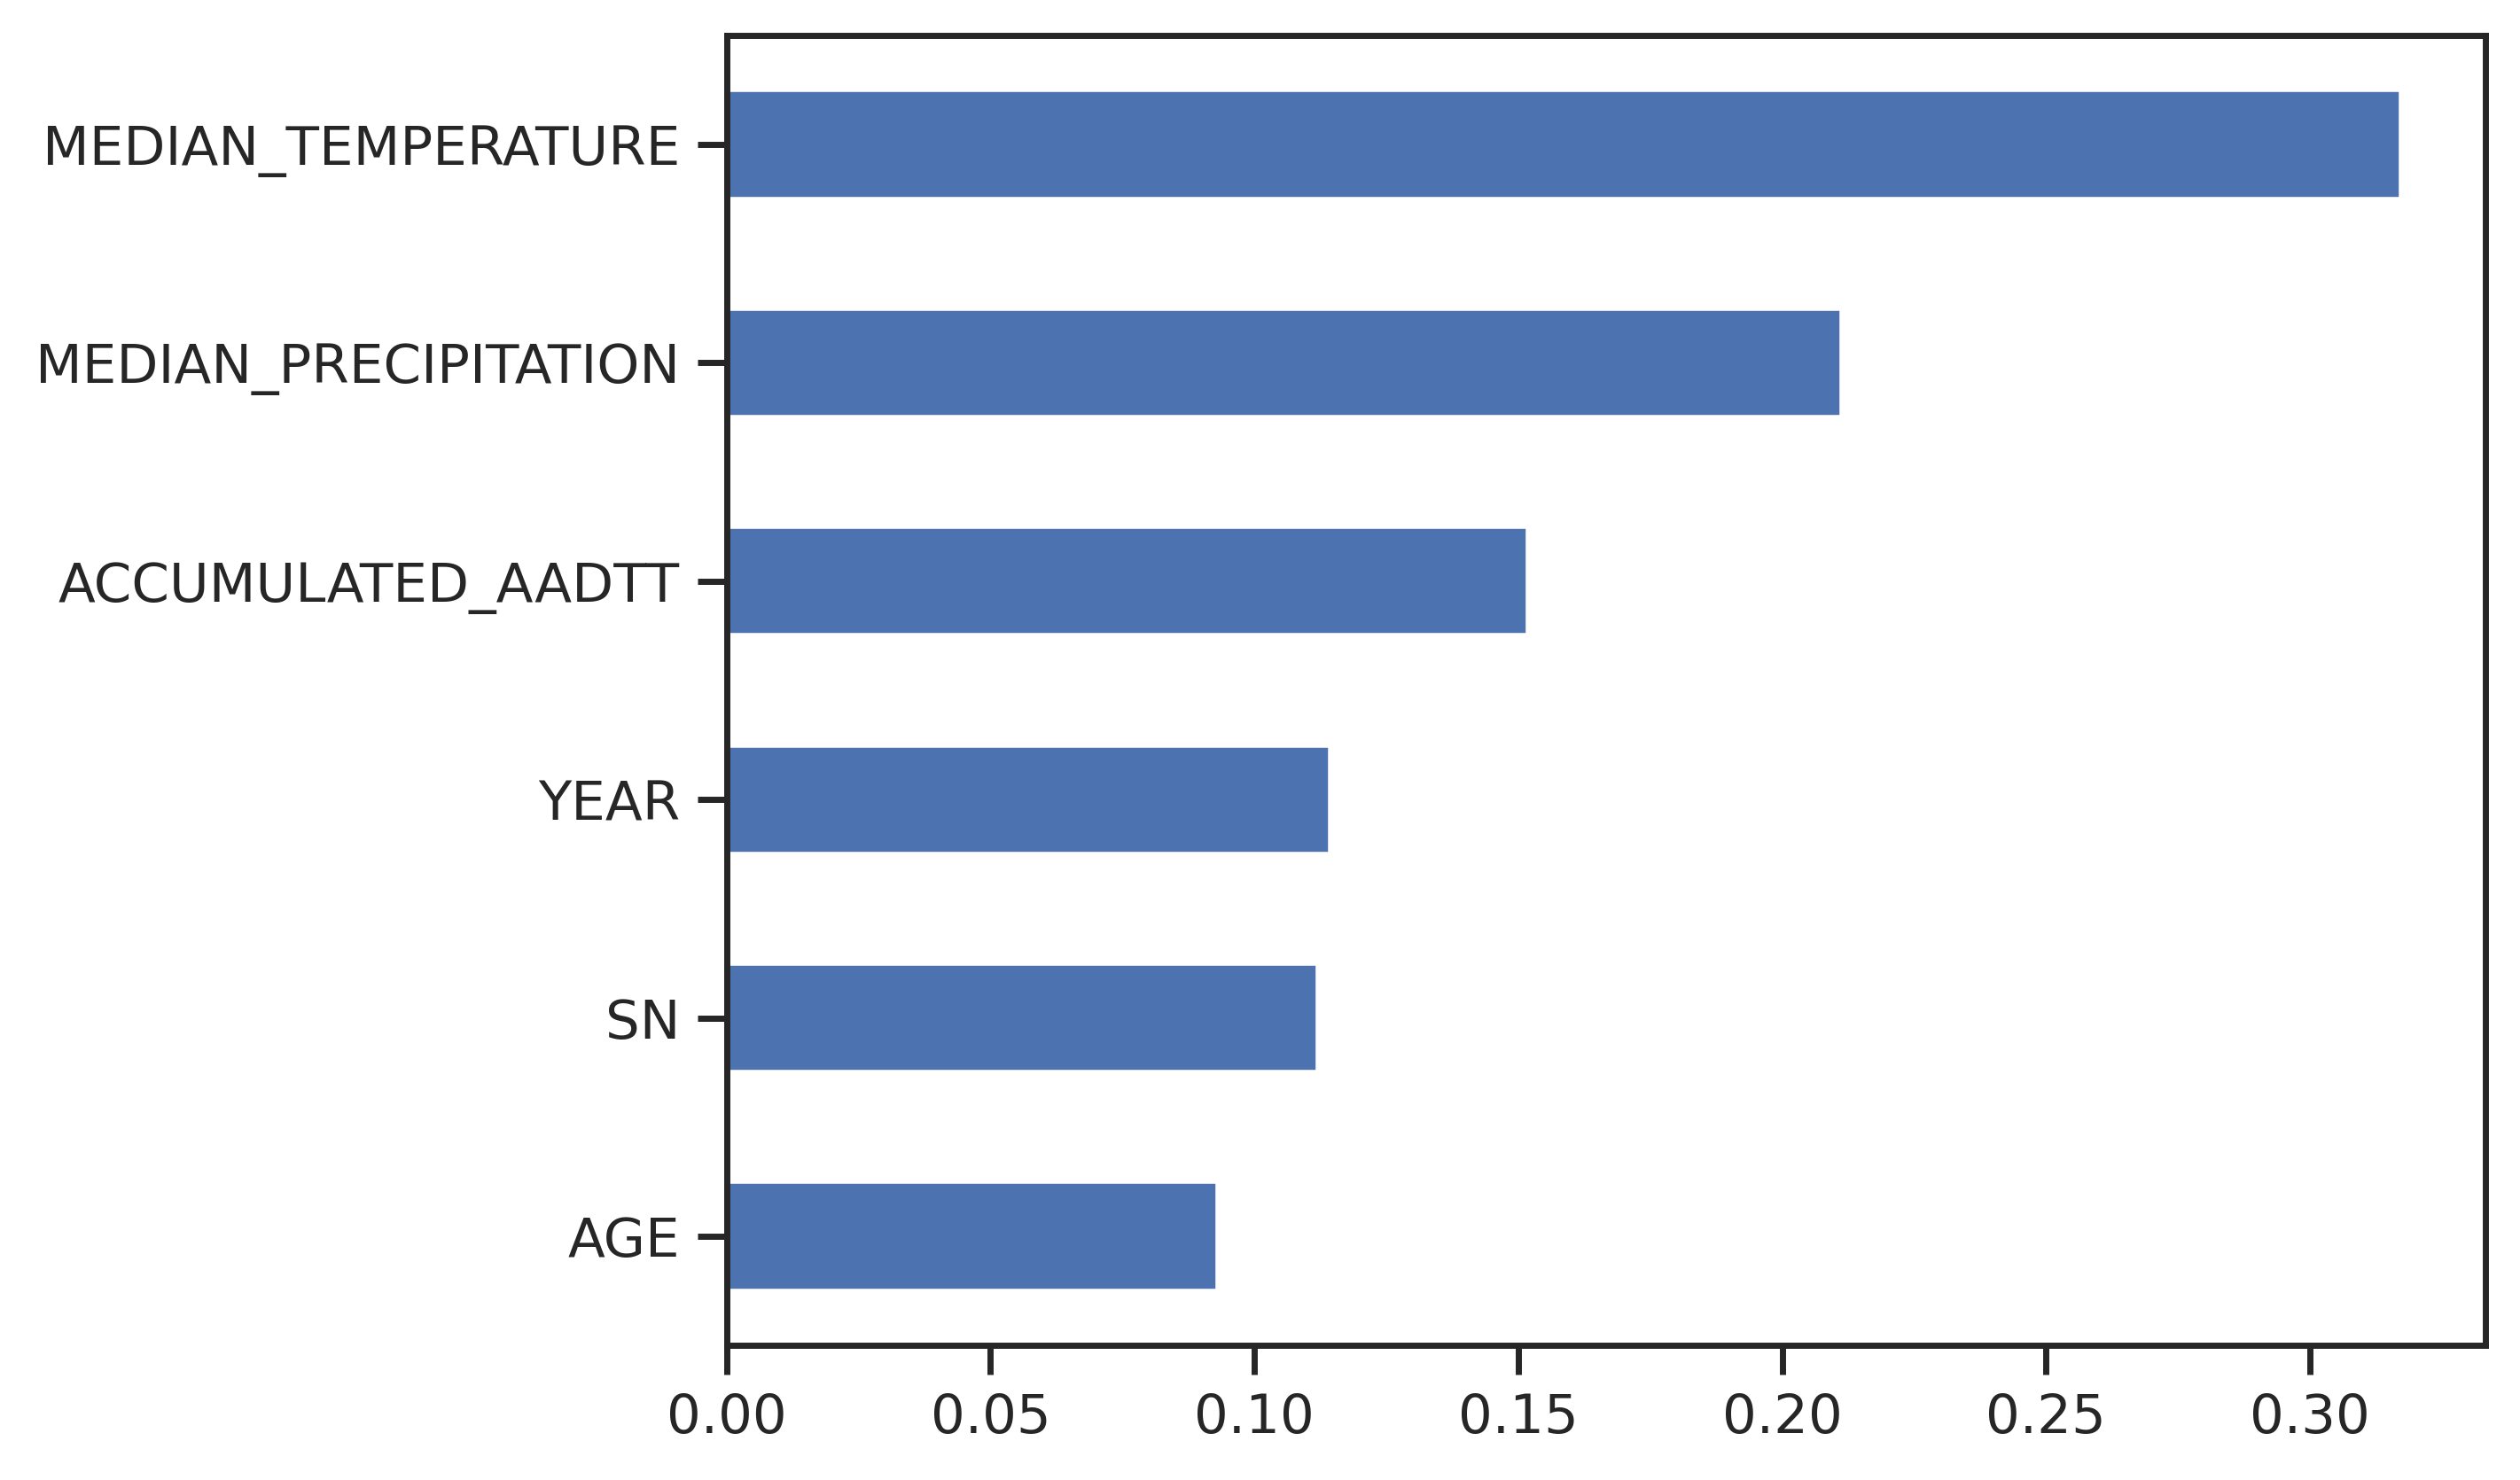

In [27]:
# feature importance for RF
importanceRF = RF_reg.feature_importances_
graphImportanceRF = pd.Series(importanceRF, index=X_train.columns).sort_values().plot.barh()

fig = graphImportanceRF.get_figure()
# fig.savefig('results/importanceRF.png')

In [28]:
# summarize feature importance for RF
for i, v in enumerate(importanceRF):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i], v))

Feature: YEAR, Score: 0.11445
Feature: SN, Score: 0.11209
Feature: AGE, Score: 0.09301
Feature: ACCUMULATED_AADTT, Score: 0.15183
Feature: MEDIAN_PRECIPITATION, Score: 0.21128
Feature: MEDIAN_TEMPERATURE, Score: 0.31734


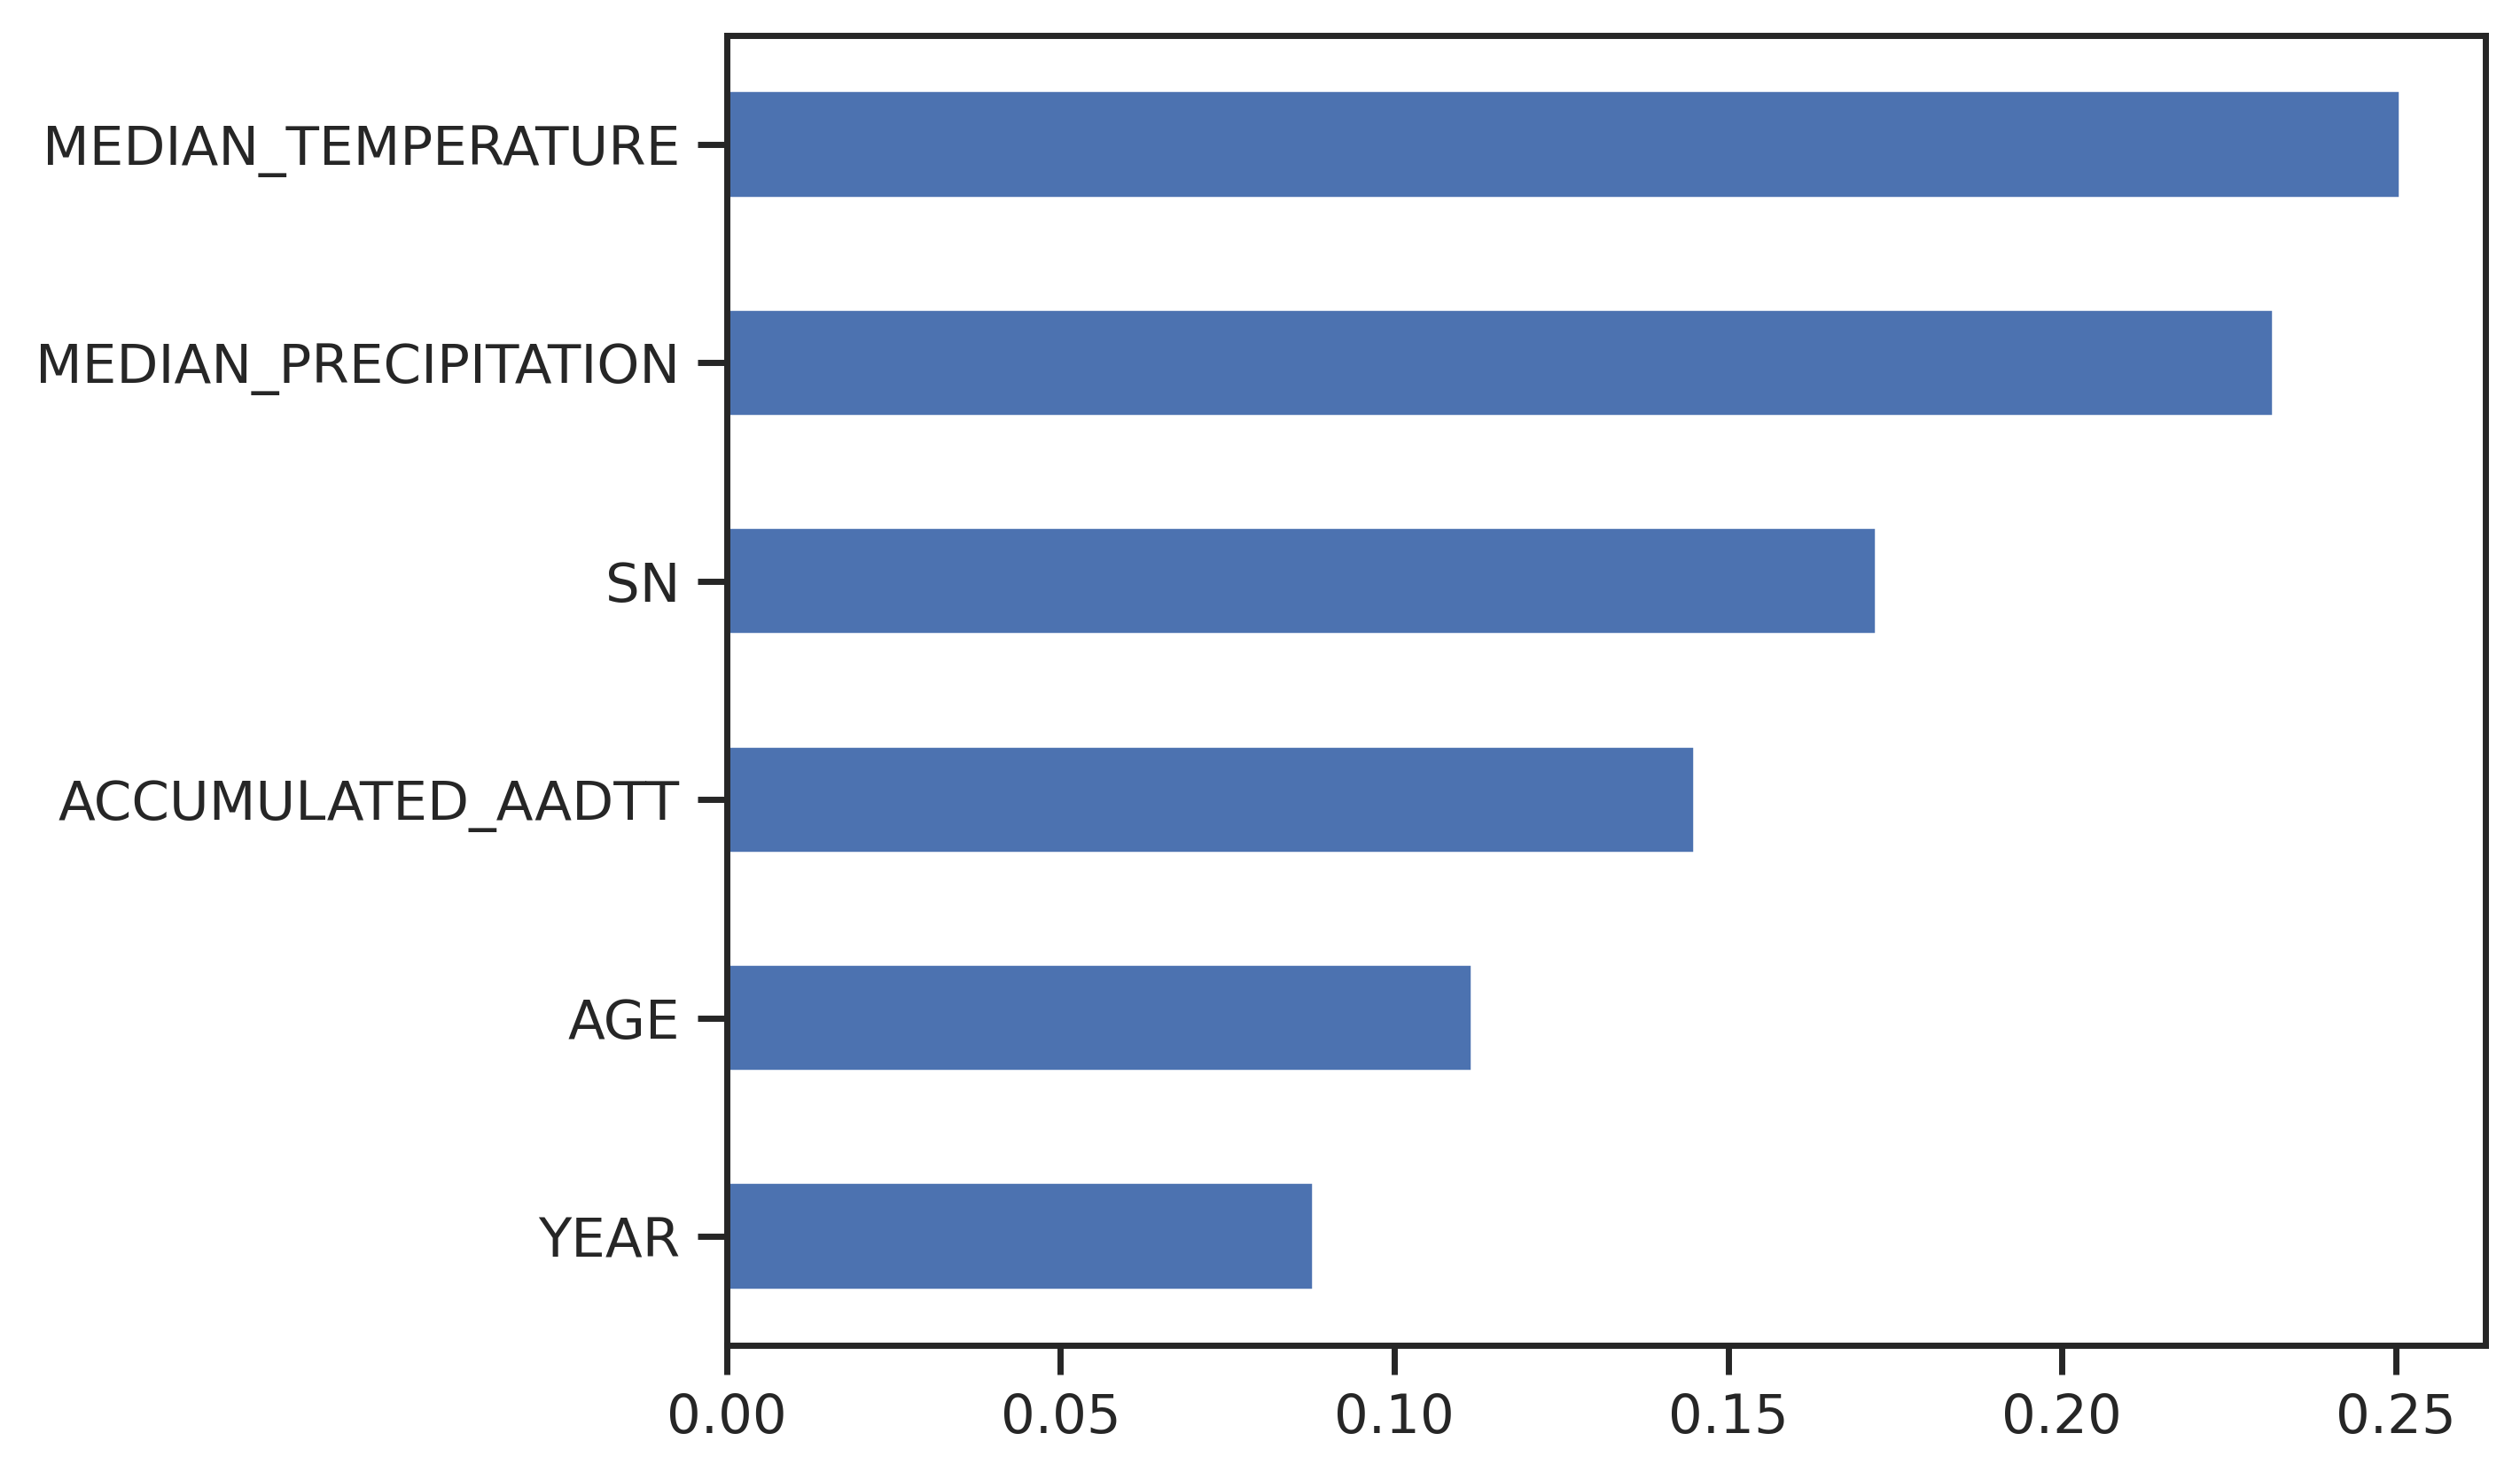

In [29]:
# feature importance for XGBoost
importanceXG = XG_reg.feature_importances_
graphImportanceXG = pd.Series(importanceXG, index=X_train.columns).sort_values().plot.barh()

fig = graphImportanceXG.get_figure()
# fig.savefig('results/importanceXG.png')

In [30]:
# summarize feature importance for XGBoost
for i, v in enumerate(importanceXG):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i], v))

Feature: YEAR, Score: 0.08807
Feature: SN, Score: 0.17237
Feature: AGE, Score: 0.11181
Feature: ACCUMULATED_AADTT, Score: 0.14515
Feature: MEDIAN_PRECIPITATION, Score: 0.23176
Feature: MEDIAN_TEMPERATURE, Score: 0.25084


In [31]:
# Metrics
def r2(y_test, y_pred):
    return round(r2_score(y_test, y_pred), 2)


def rmse(y_test, y_pred):
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)


def mae(y_test, y_pred):
    return round(mean_absolute_error(y_test, y_pred), 2)


# r2
r2DT = r2(y_test, resultDT)
r2RF = r2(y_test, resultRF)
r2XG = r2(y_test, resultXG)

# rmse
rmseDT = rmse(y_test, resultDT)
rmseRF = rmse(y_test, resultRF)
rmseXG = rmse(y_test, resultXG)

# MAE
maeDT = mae(y_test, resultDT)
maeRF = mae(y_test, resultRF)
maeXG = mae(y_test, resultXG)

In [32]:
# Display results
print("Model Performance Metrics:")
print("-" * 30)

print("\nDecision Tree (DT):")
print(f"R2   : {r2DT}")
print(f"RMSE : {rmseDT}")
print(f"MAE  : {maeDT}")

print("\nRandom Forest (RF):")
print(f"R2   : {r2RF}")
print(f"RMSE : {rmseRF}")
print(f"MAE  : {maeRF}")

print("\nXGBoost:")
print(f"R2   : {r2XG}")
print(f"RMSE : {rmseXG}")
print(f"MAE  : {maeXG}")

Model Performance Metrics:
------------------------------

Decision Tree (DT):
R2   : -0.05
RMSE : 0.62
MAE  : 0.32

Random Forest (RF):
R2   : 0.55
RMSE : 0.4
MAE  : 0.26
\XGBoost:
R2   : 0.59
RMSE : 0.39
MAE  : 0.24


In [33]:
# calc. of samples
n_train = int(X.shape[0]*train_threshold)
n_test = int(X.shape[0])-n_train

In [34]:
# np.shape(TreeRegResult)[0]
x = np.arange(np.shape(y_test)[0])

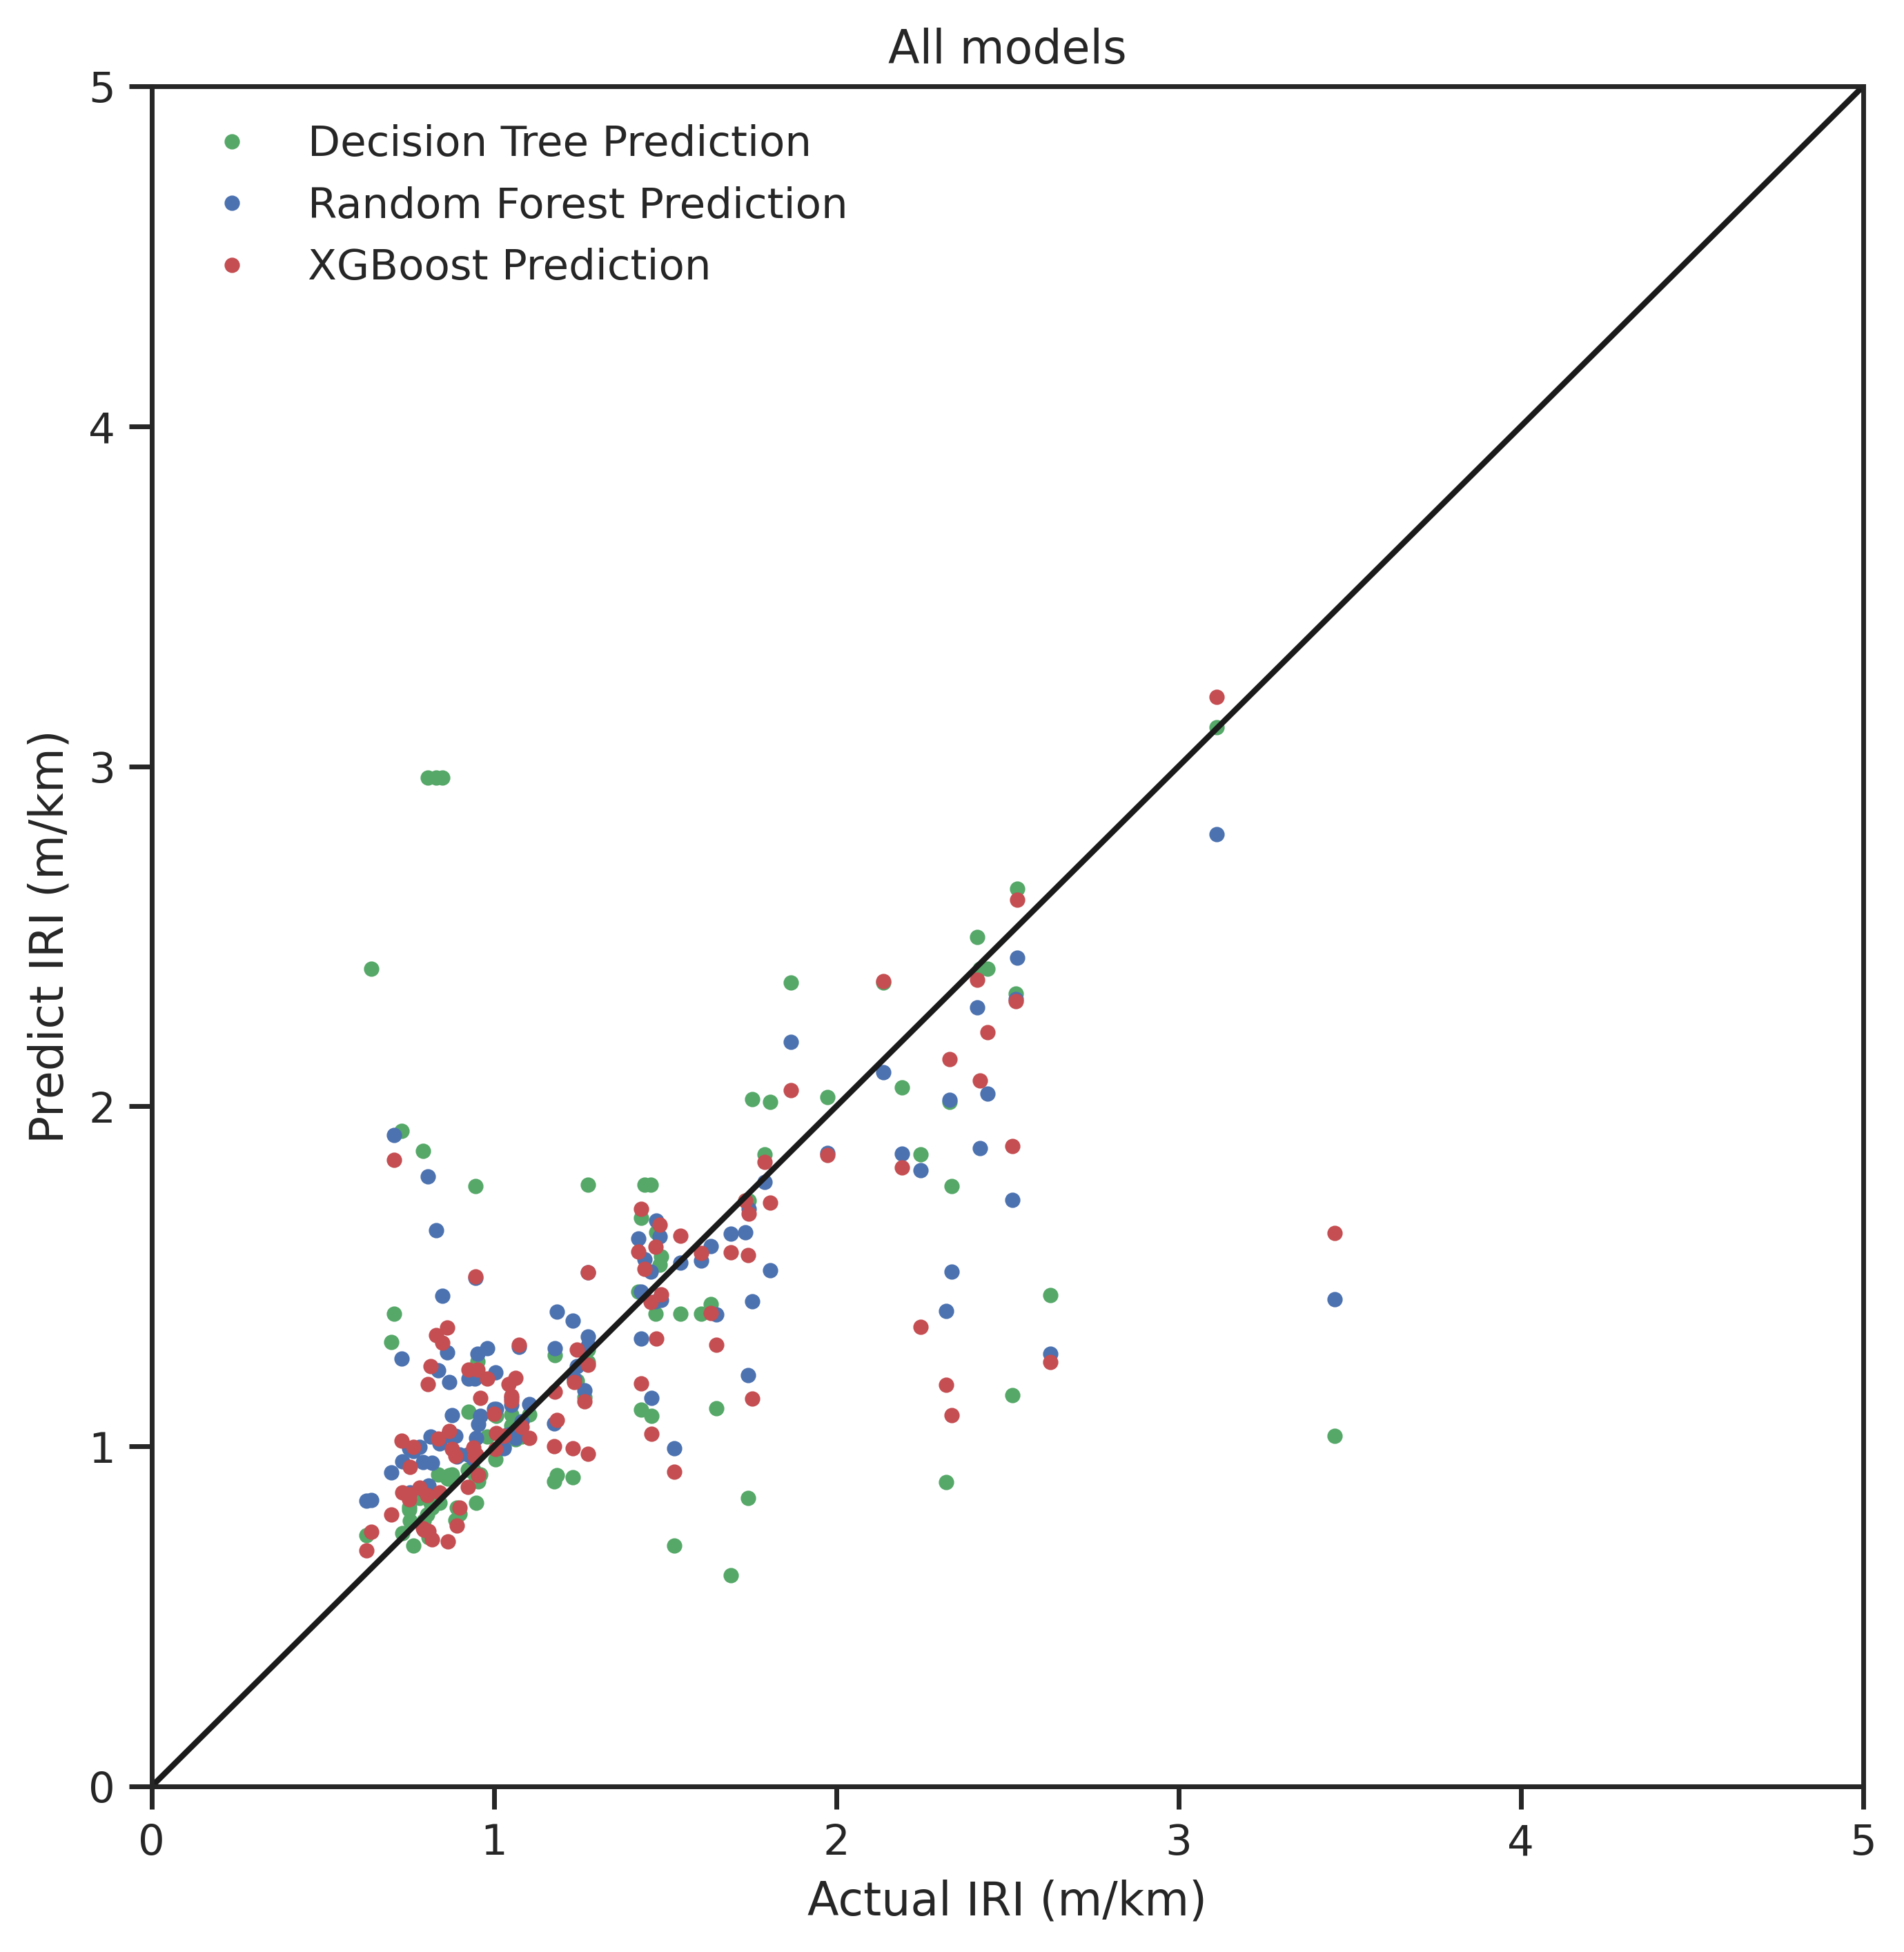

In [35]:
# plot all results
plt.rcParams['figure.figsize'] = (8, 8)
plt.plot(y_test, resultDT, 'g.', label='Decision Tree Prediction')
plt.plot(y_test, resultRF, 'b.', label='Random Forest Prediction')
plt.plot(y_test, resultXG, 'r.', label='XGBoost Prediction')
plt.xlabel('Actual IRI (m/km)')
plt.ylabel('Predict IRI (m/km)')
plt.plot(x, x, 'k-')  # identity line
# poor to fair threshold.. 2.7
# plt.hlines(2.7, 0, 2.7, colors='black', linestyles='dashed', linewidth=1.2)
# plt.vlines(2.7, 0, 2.7, colors='black', linestyles='dashed', linewidth=1.2)
plt.axis([0, 5, 0, 5])
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.title("All models")
# plt.savefig('results/treesComparison.png')
plt.show()

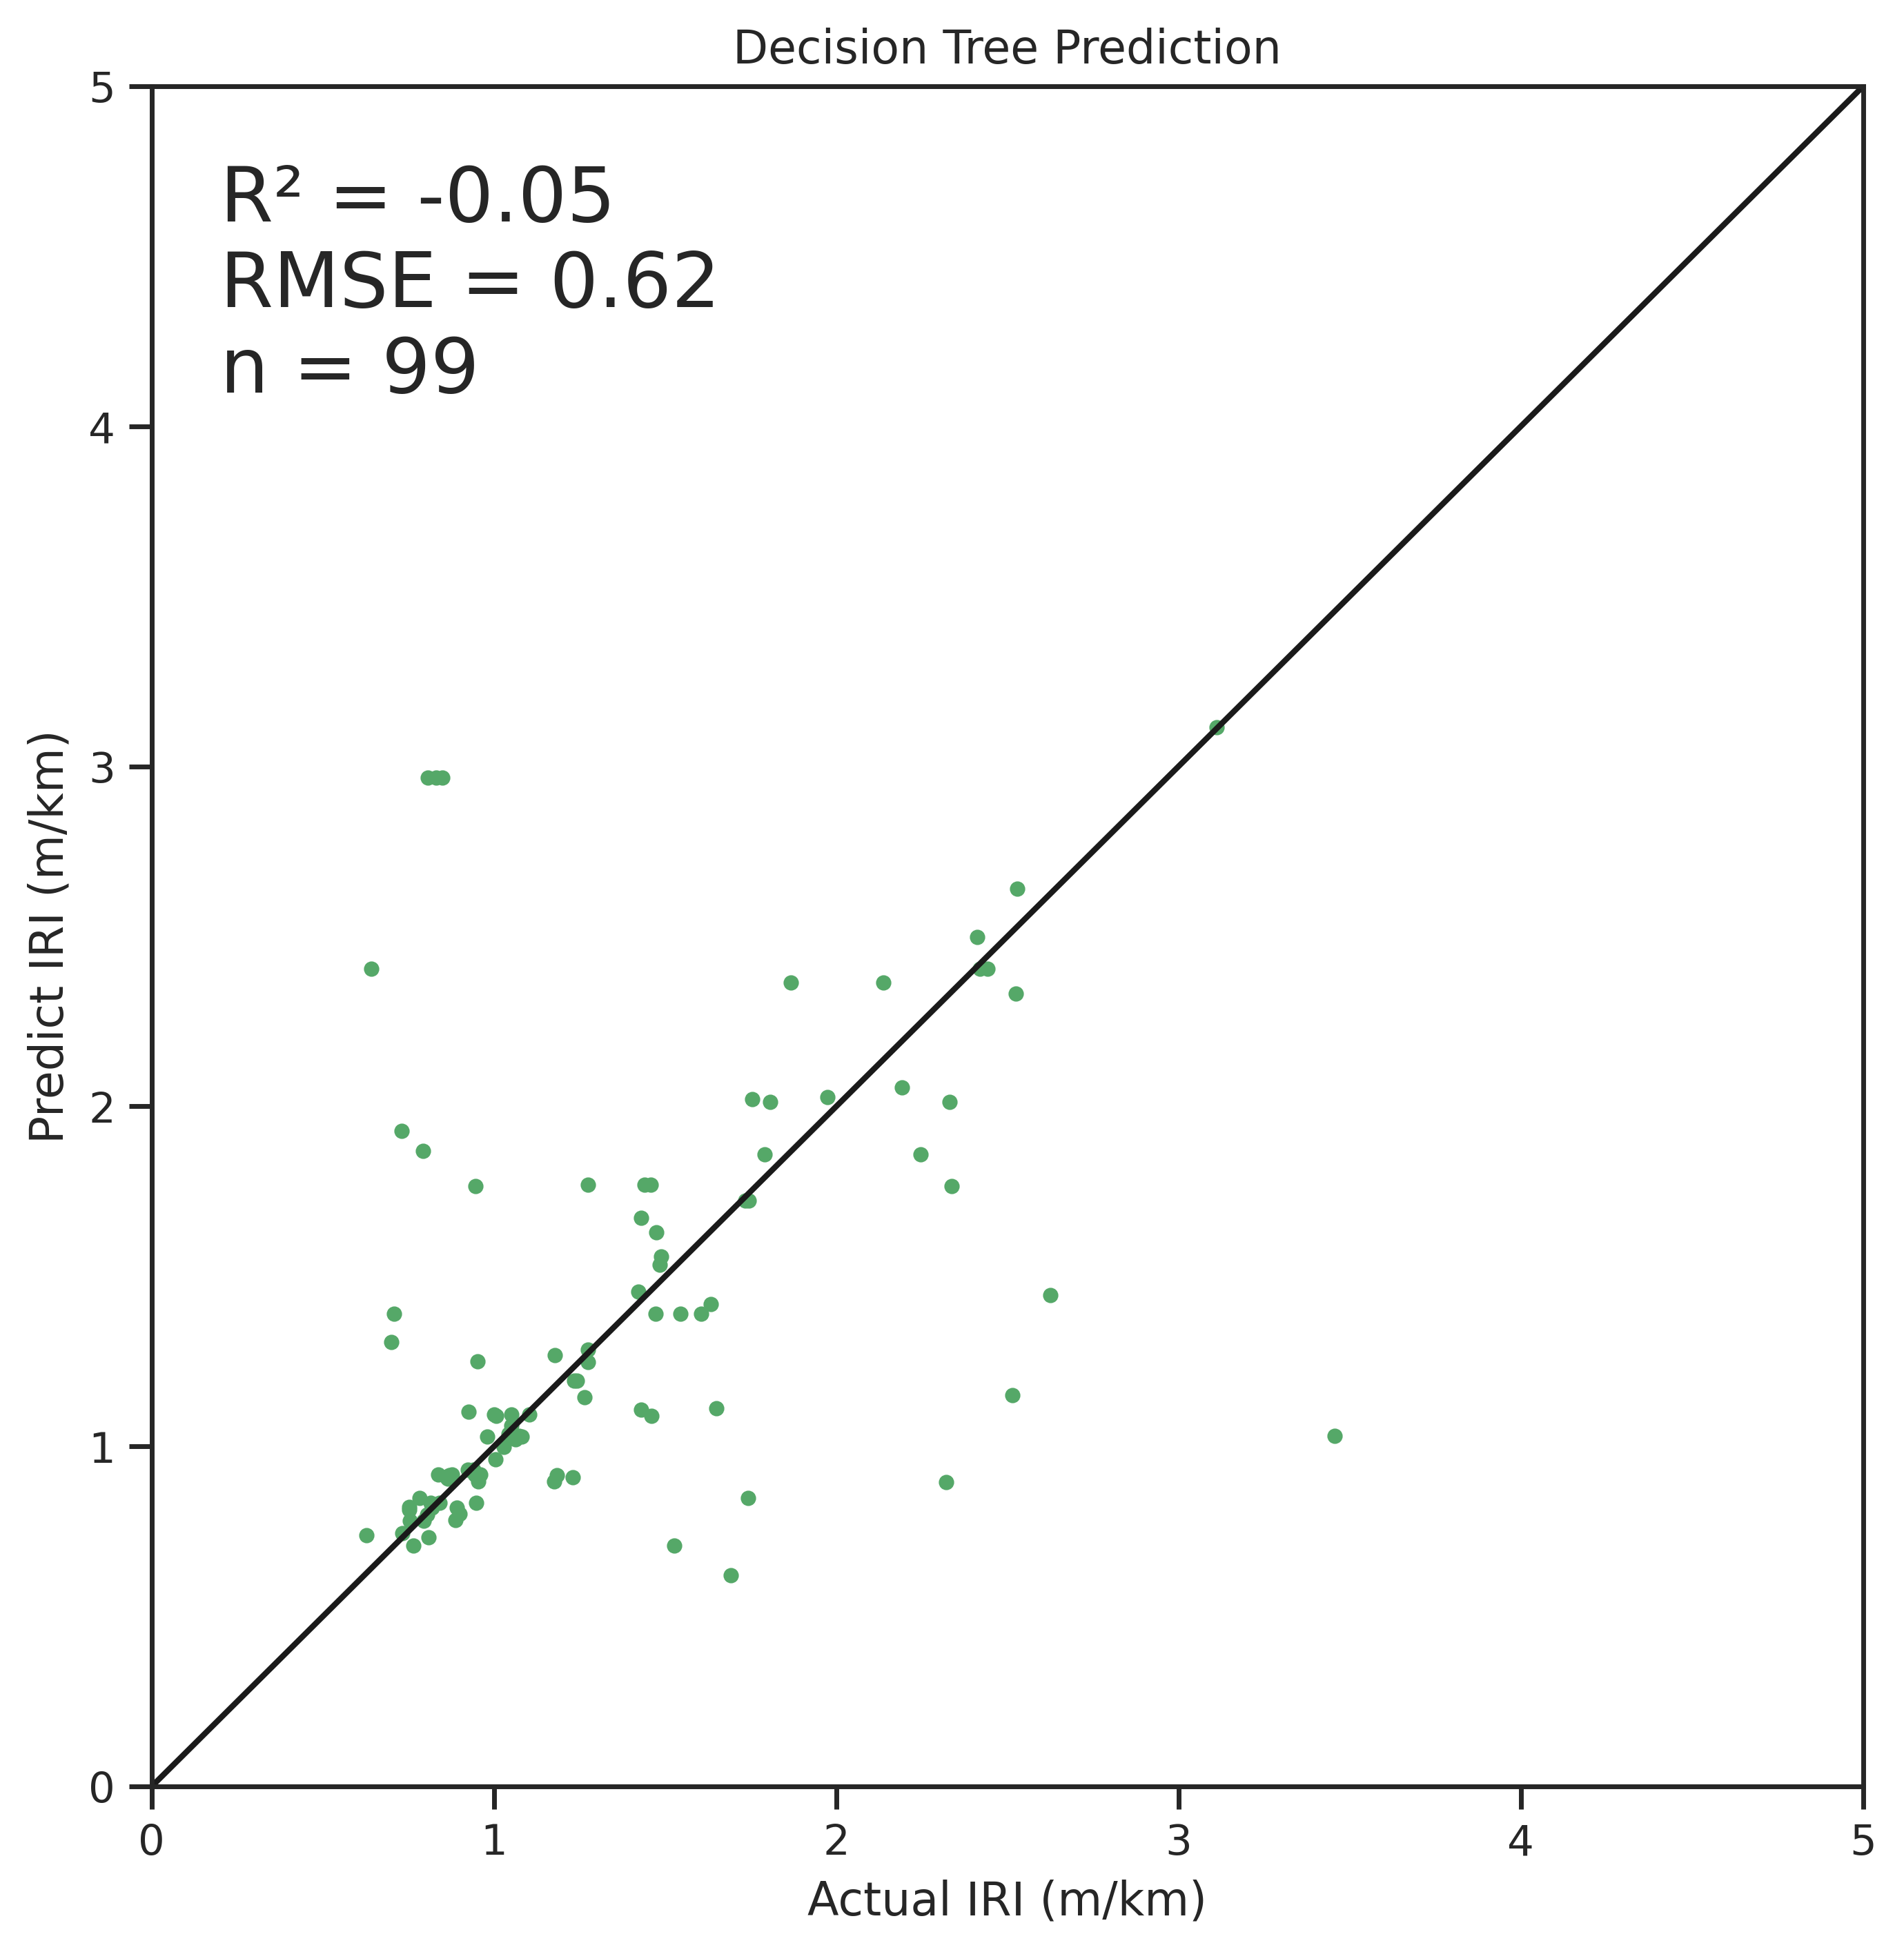

In [36]:
# plot DT results (test)
plt.rcParams['figure.figsize'] = (8,8)
plt.plot(y_test, resultDT, 'g.')
plt.xlabel('Actual IRI (m/km)')
plt.ylabel('Predict IRI (m/km)')
plt.plot(x, x, 'k-')  # identity line
plt.axis([0, 5, 0, 5])
s = "R² = %.2f \nRMSE = %.2f\nn = %i" % (r2DT, rmseDT, n_test)
plt.text(0.2, 4.1, s, fontsize=20)
plt.title("Decision Tree Prediction")
# plt.savefig('results/DT.png')
plt.show()

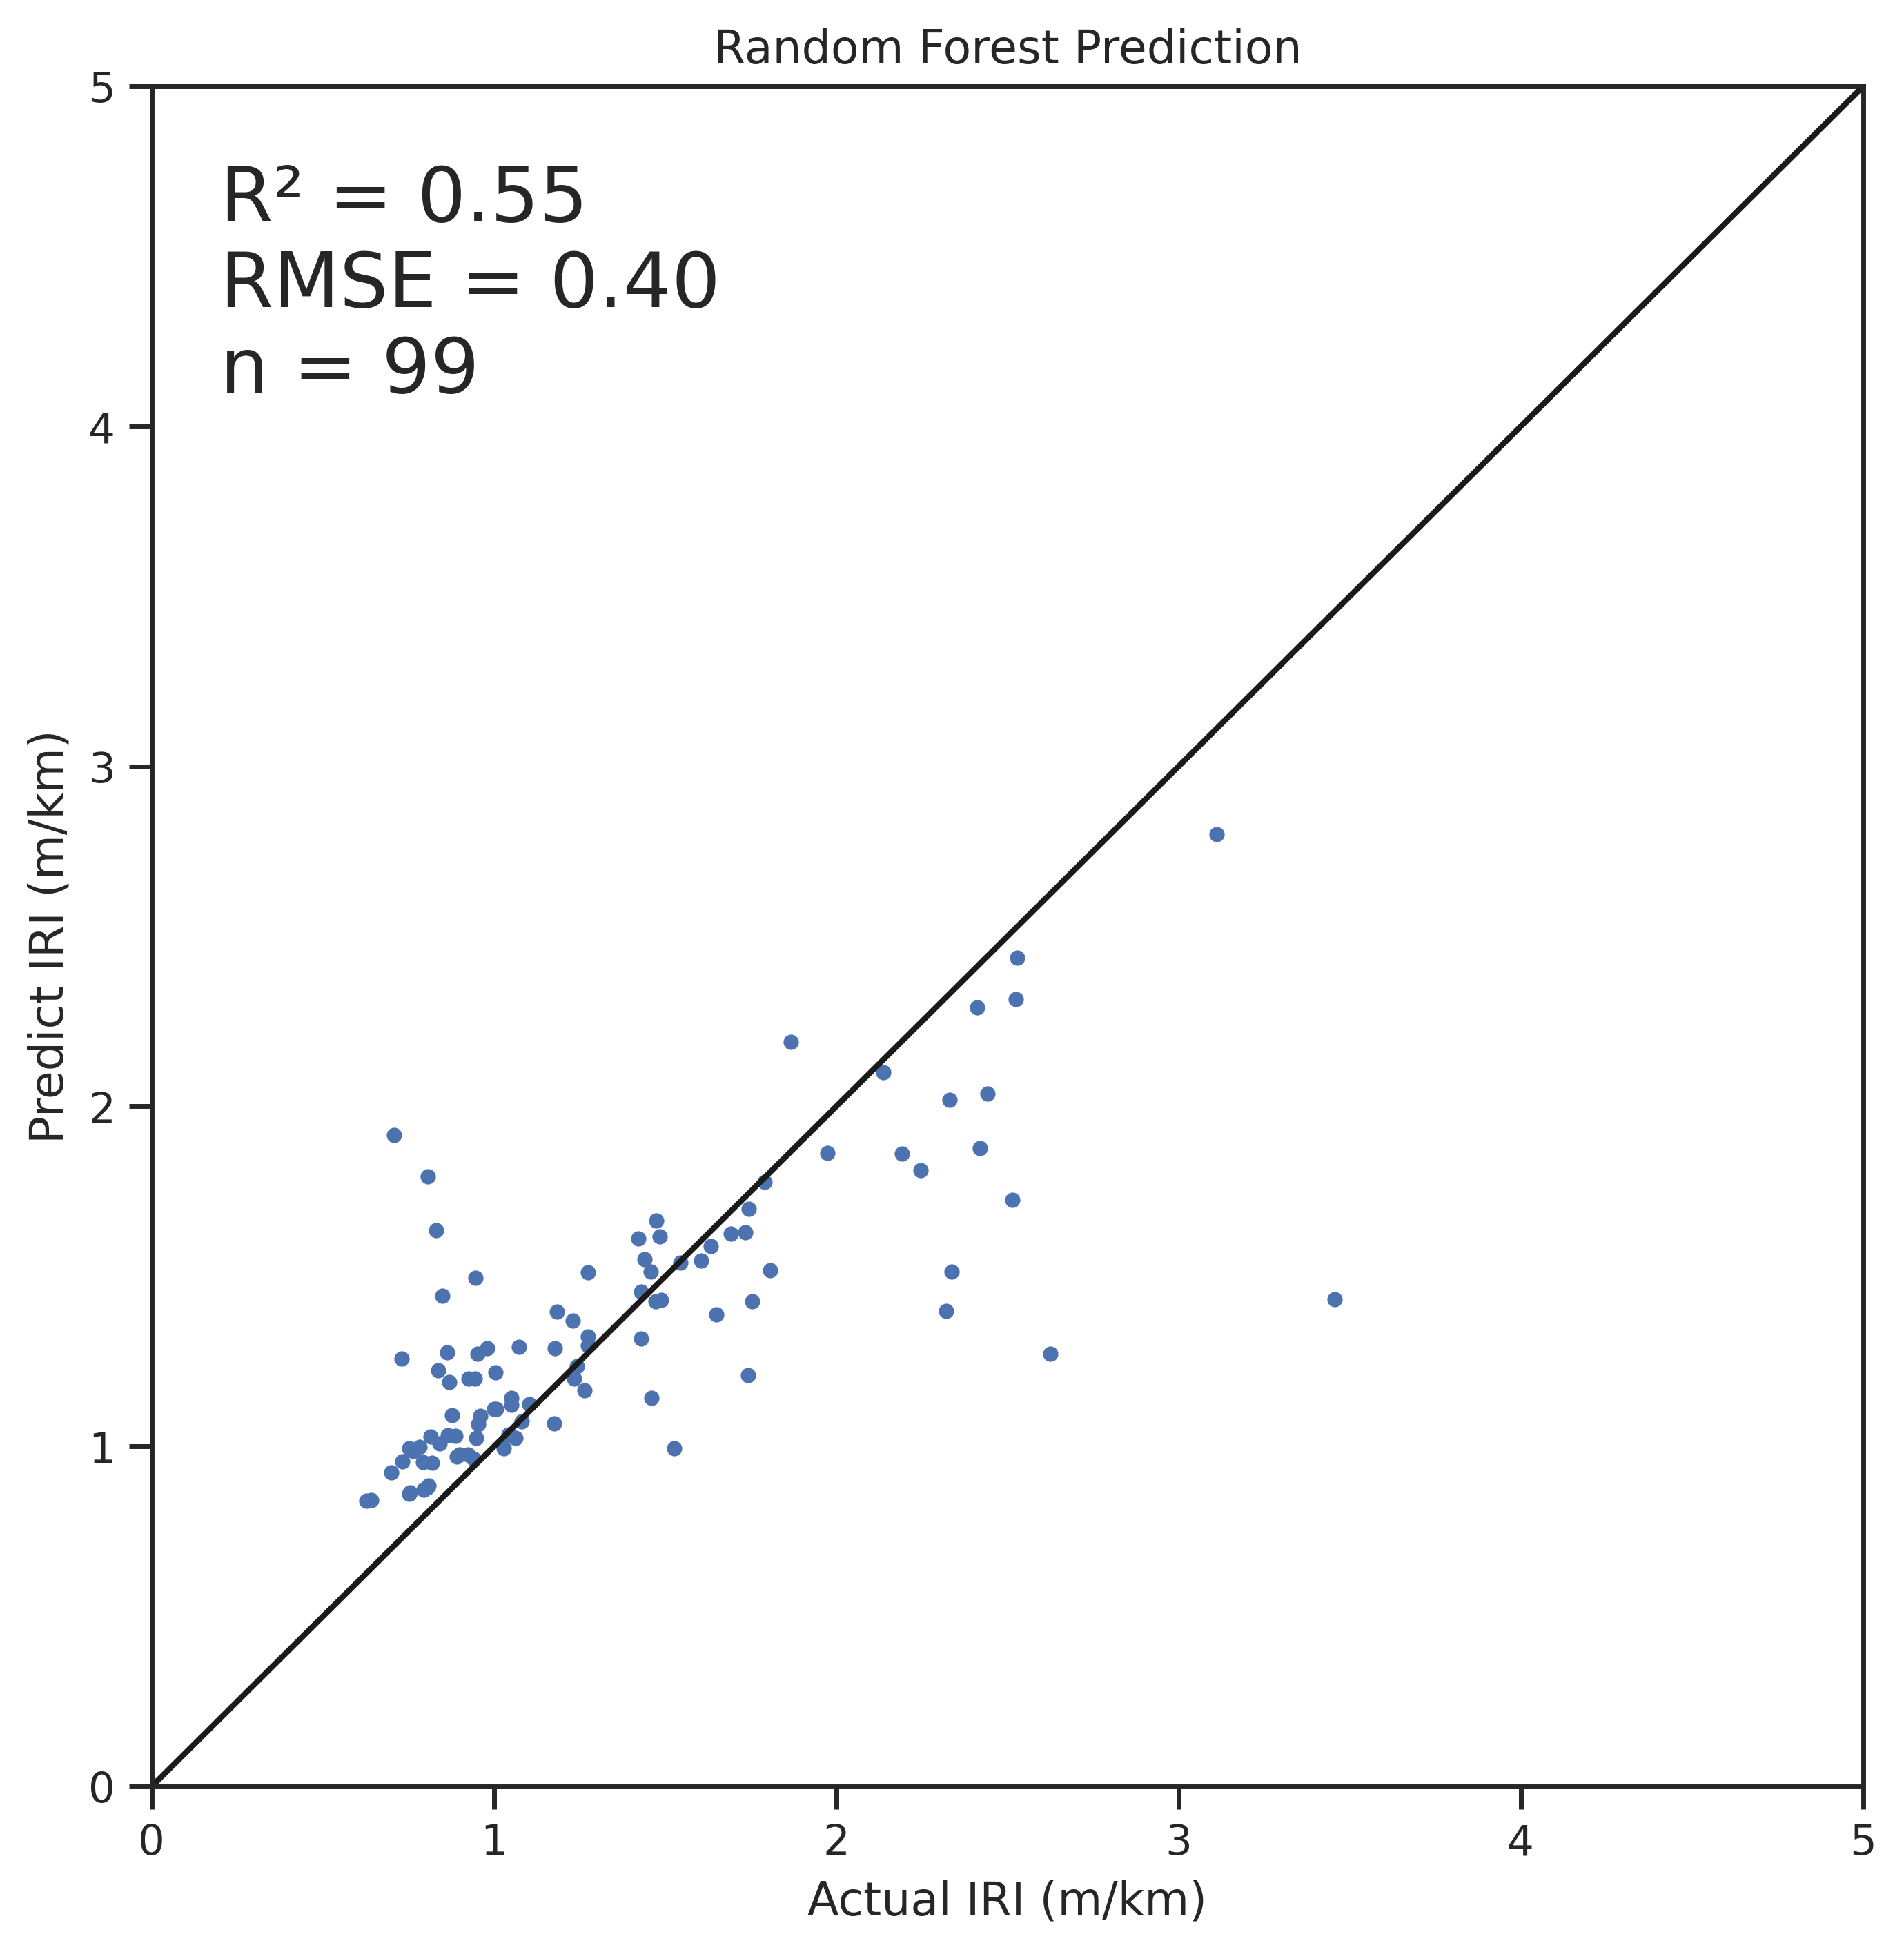

In [37]:
# plot RF results
plt.rcParams['figure.figsize'] = (8, 8)
plt.plot(y_test, resultRF, 'b.')
plt.xlabel('Actual IRI (m/km)')
plt.ylabel('Predict IRI (m/km)')
plt.plot(x, x, 'k-')  # identity line
plt.axis([0, 5, 0, 5])
s = "R² = %.2f \nRMSE = %.2f\nn = %i" % (r2RF, rmseRF, n_test)
plt.text(0.2, 4.1, s, fontsize=20)
plt.title("Random Forest Prediction")
# plt.savefig('results/RF.png')
plt.show()

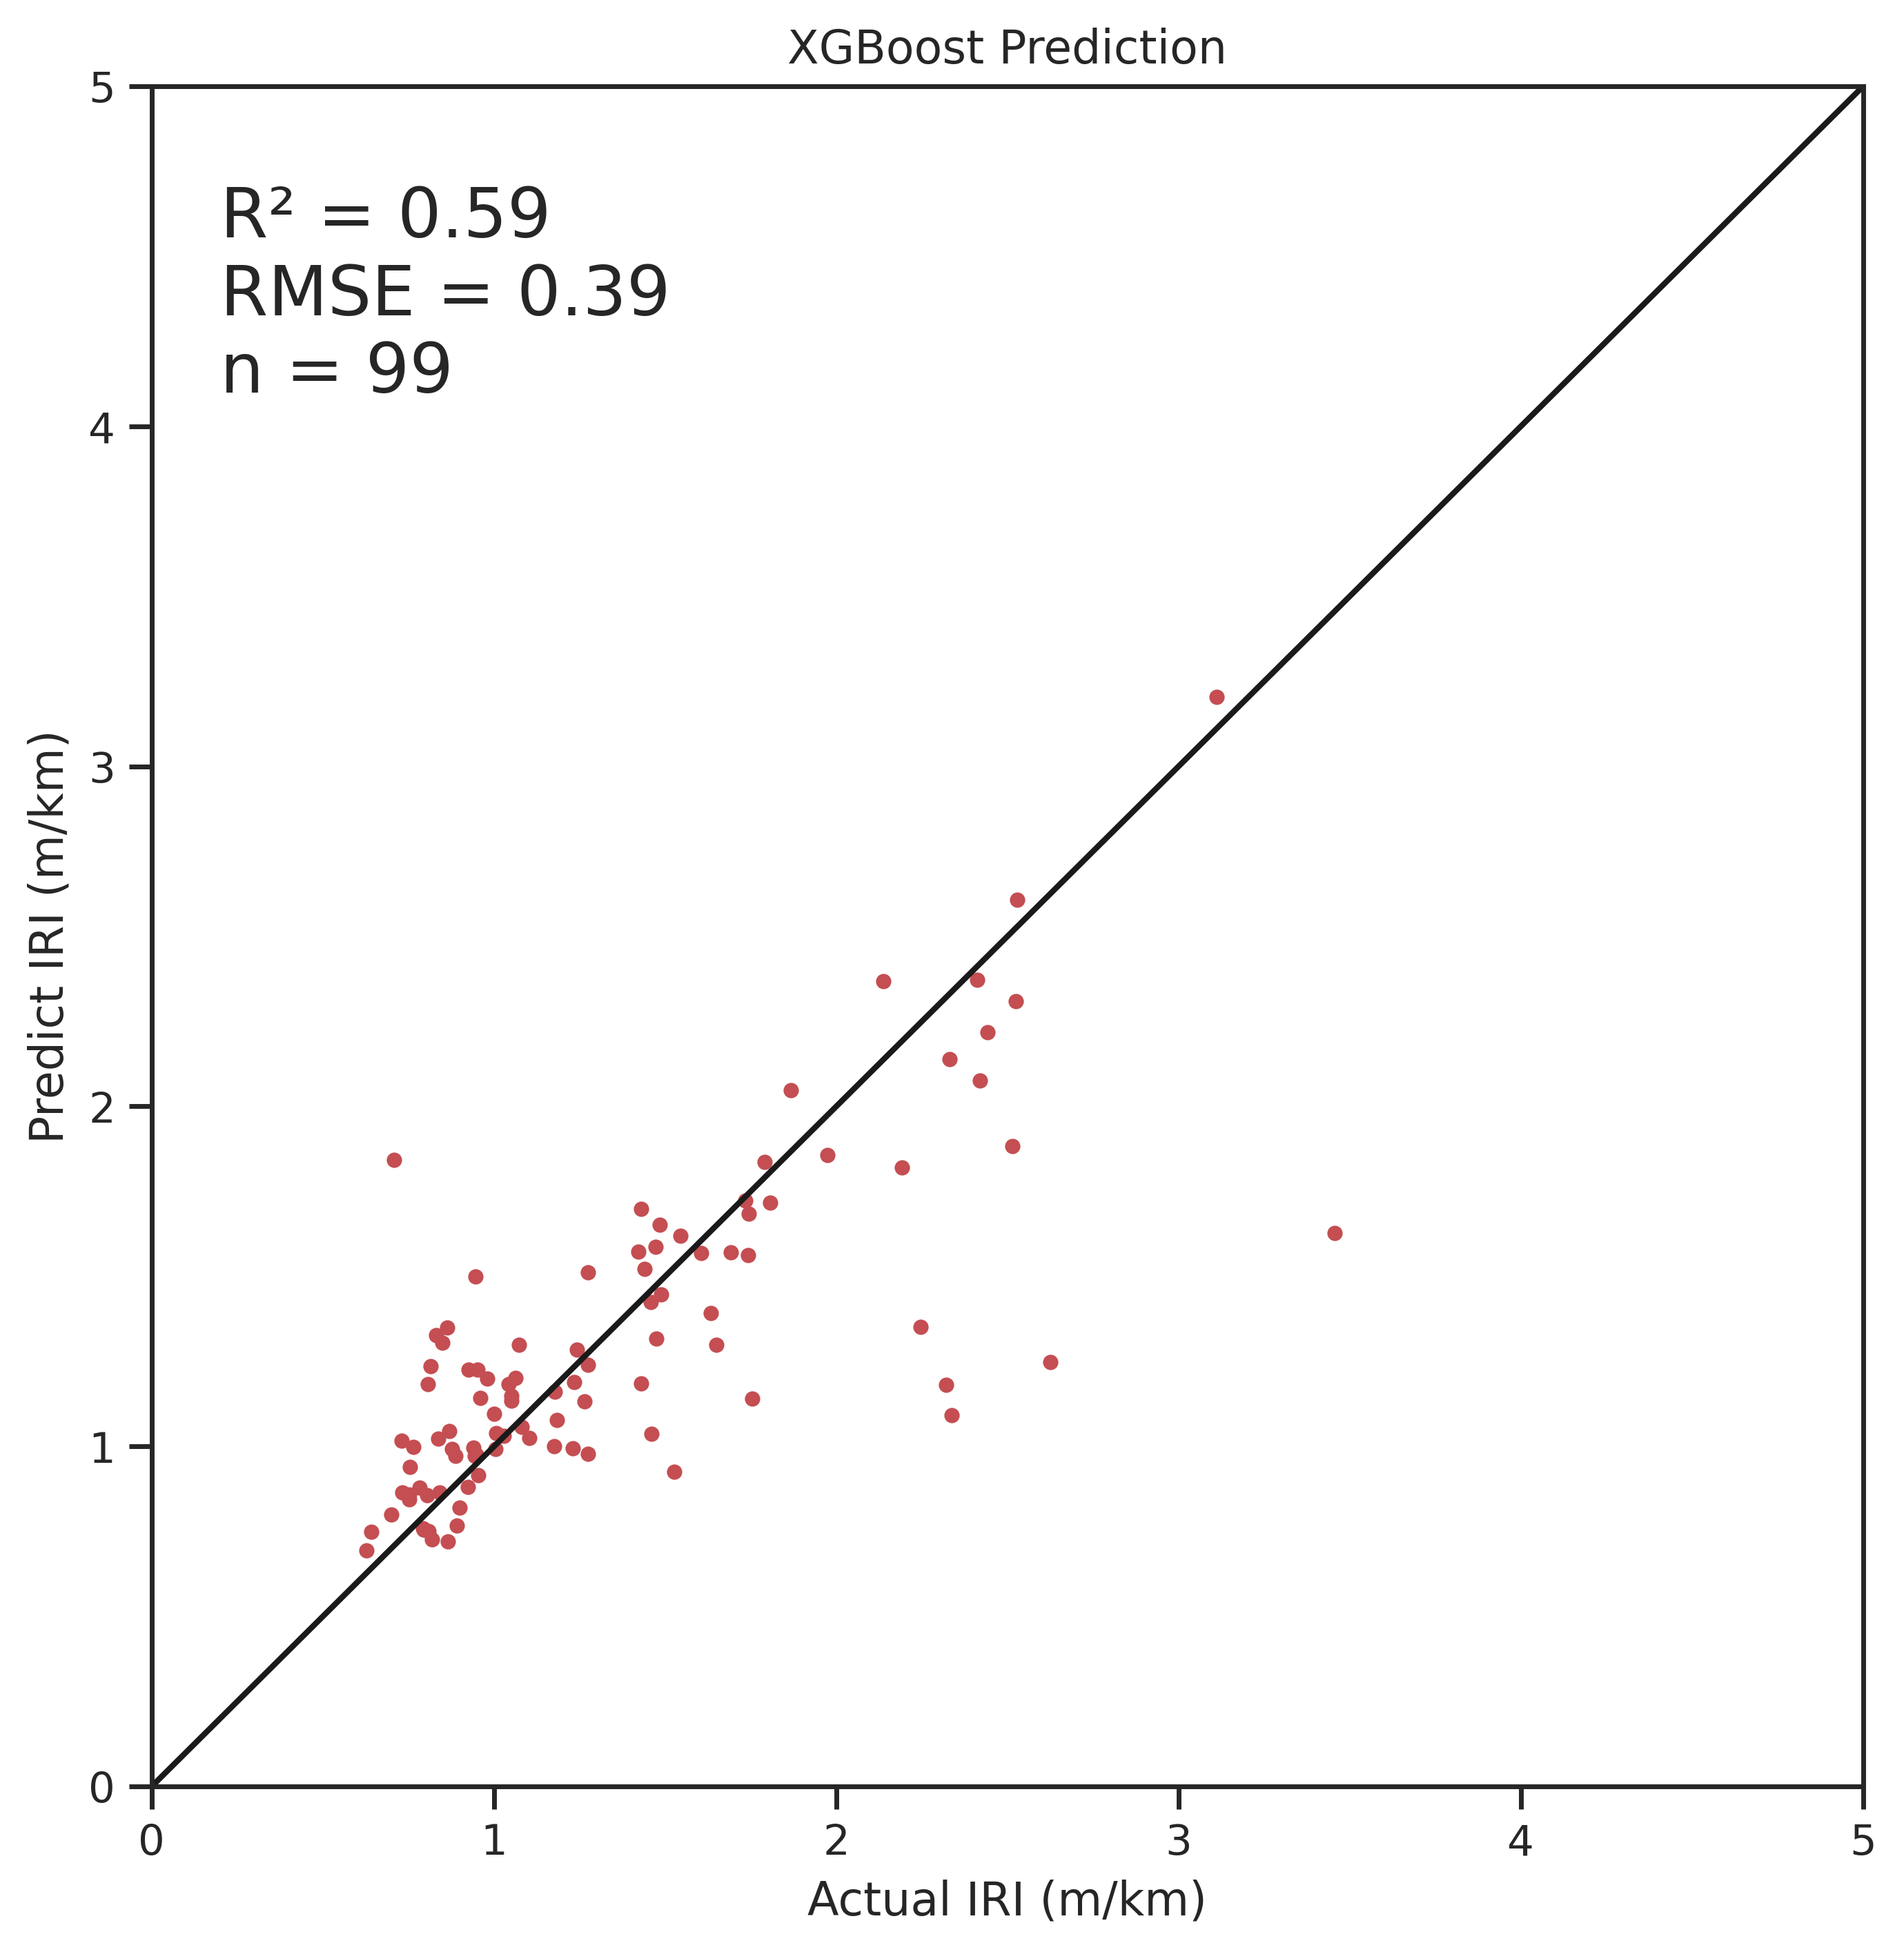

In [38]:
# plot XGBoost results
plt.rcParams['figure.figsize'] = (8, 8)
plt.plot(y_test, resultXG, 'r.', label='XGBoost Prediction')
plt.xlabel('Actual IRI (m/km)')
plt.ylabel('Predict IRI (m/km)')
plt.plot(x, x, 'k-')  # identity line
plt.axis([0, 5, 0, 5])
s = "R² = %.2f \nRMSE = %.2f\nn = %i" % (r2XG, rmseXG, n_test)
plt.text(0.2, 4.1, s, fontsize=18)
plt.title("XGBoost Prediction")
# plt.savefig('results/XGBoost.png')
plt.show()